# Task 1

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from scipy import sparse 

G = pd.read_pickle('small_graph.pickle')
G

Number of nodes: 537
Number of edges: 7715
Average degree: 28.733705772811916
Is the graph connected? True
Number of connected components: 1
Diameter: 7
Density: 0.05360766002390283


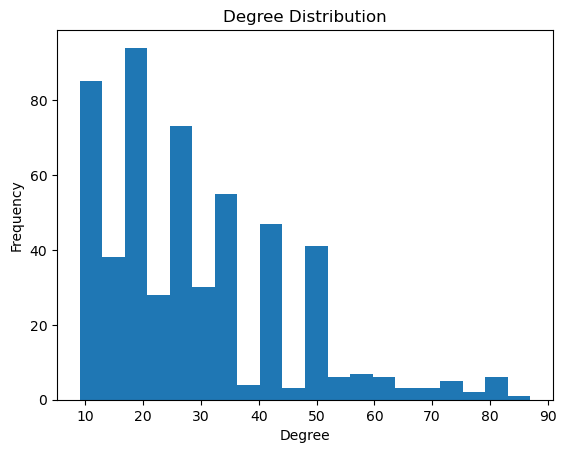

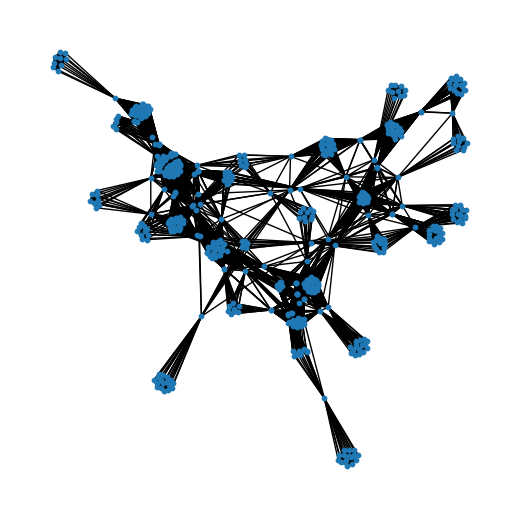

In [2]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
degrees = [G.degree(n) for n in G.nodes()]
print(f"Average degree: {sum(degrees) / len(degrees)}")
print(f"Is the graph connected? {nx.is_connected(G)}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
import networkx as nx
# Calculate the diameter of the graph
diameter = nx.diameter(G)
print(f"Diameter: {diameter}")
# Calculate the density of the graph
density = nx.density(G)
print(f"Density: {density}")

plt.hist(degrees, bins=20)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(5, 5)) 
pos = nx.spring_layout(G)
nx.draw(G, pos , with_labels=False, node_size=10)
plt.show()

In [3]:
import community as community_louvain

# Apply the Louvain method to find communities
partition = community_louvain.best_partition(G)

# The partition is a dictionary where the keys are the nodes and the values are the community IDs
# You can add this information as node attributes to the graph for easier access
for node, community_id in partition.items():
    G.nodes[node]['community'] = community_id

unique_communities = set(node[1]['community'] for node in G.nodes(data=True))

# The number of unique communities is the length of the set
num_communities = len(unique_communities)
print(f"There are {num_communities} communities in the graph.")

There are 13 communities in the graph.


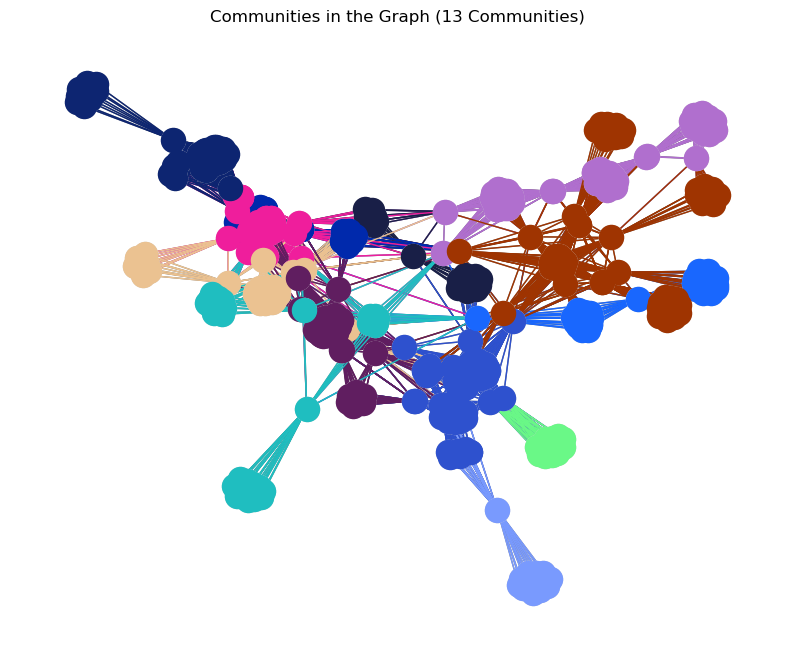

In [5]:
import random
num_communities = max(partition.values()) + 1

# Generate random colors for each community
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_communities)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_color='lightgray', ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)

# Draw each community with a different color
for community_id in range(num_communities):
    community_nodes = [node for node, community in partition.items() if community == community_id]
    community_edges = G.edges(community_nodes)
    nx.draw_networkx_nodes(G, pos, nodelist=community_nodes, node_color=colors[community_id], ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=community_edges, edge_color=colors[community_id], ax=ax)

# Add labels and title
#nx.draw_networkx_labels(G, pos, ax=ax)
plt.title(f"Communities in the Graph ({num_communities} Communities)")
plt.axis('off')
plt.show()

In [3]:
#a dictionary of all the nodes and their respective degrees 
#degrees is a dictionary that you can use to look up the degree of any node in the graph. 
#For example, degrees[node] will give you the degree of node
degrees = dict(G.degree())

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
clustering_coefficients = nx.clustering(G)

The average degree centrality: 0.053607660023902916
The average Closeness centrality: 0.3101372153947287
The average Betweenness centrality: 0.0042973406345809696
The average Eigenvector centrality: 0.017964838787195632
Average Clustering Coefficient for the graph:0.935174327127481


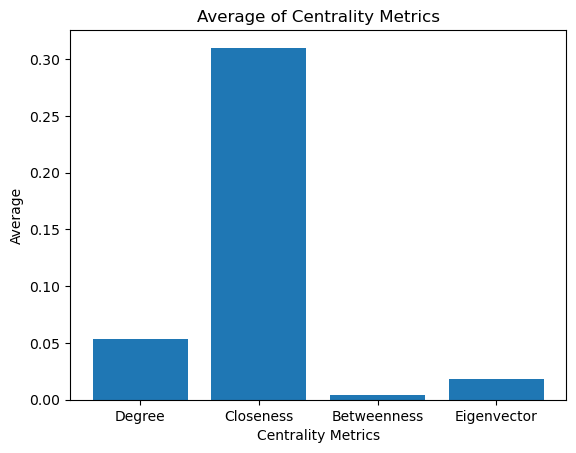

In [8]:
# The Averages
avg_degree = sum(degree_centrality.values()) / len(degree_centrality)
avg_closeness = sum(closeness_centrality.values()) / len(closeness_centrality)
avg_betweenness = sum(betweenness_centrality.values()) / len(betweenness_centrality)
avg_eigenvector = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)
avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print("The average degree centrality: " + str(avg_degree))
print("The average Closeness centrality: " + str(avg_closeness))
print("The average Betweenness centrality: " + str(avg_betweenness))
print("The average Eigenvector centrality: " + str(avg_eigenvector))
print("Average Clustering Coefficient for the graph:"+ str(avg_clustering_coefficient ))

labels = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']
values = [avg_degree, avg_closeness, avg_betweenness, avg_eigenvector]
plt.bar(labels, values)
plt.xlabel('Centrality Metrics')
plt.ylabel('Average')
plt.title('Average of Centrality Metrics')
plt.show()



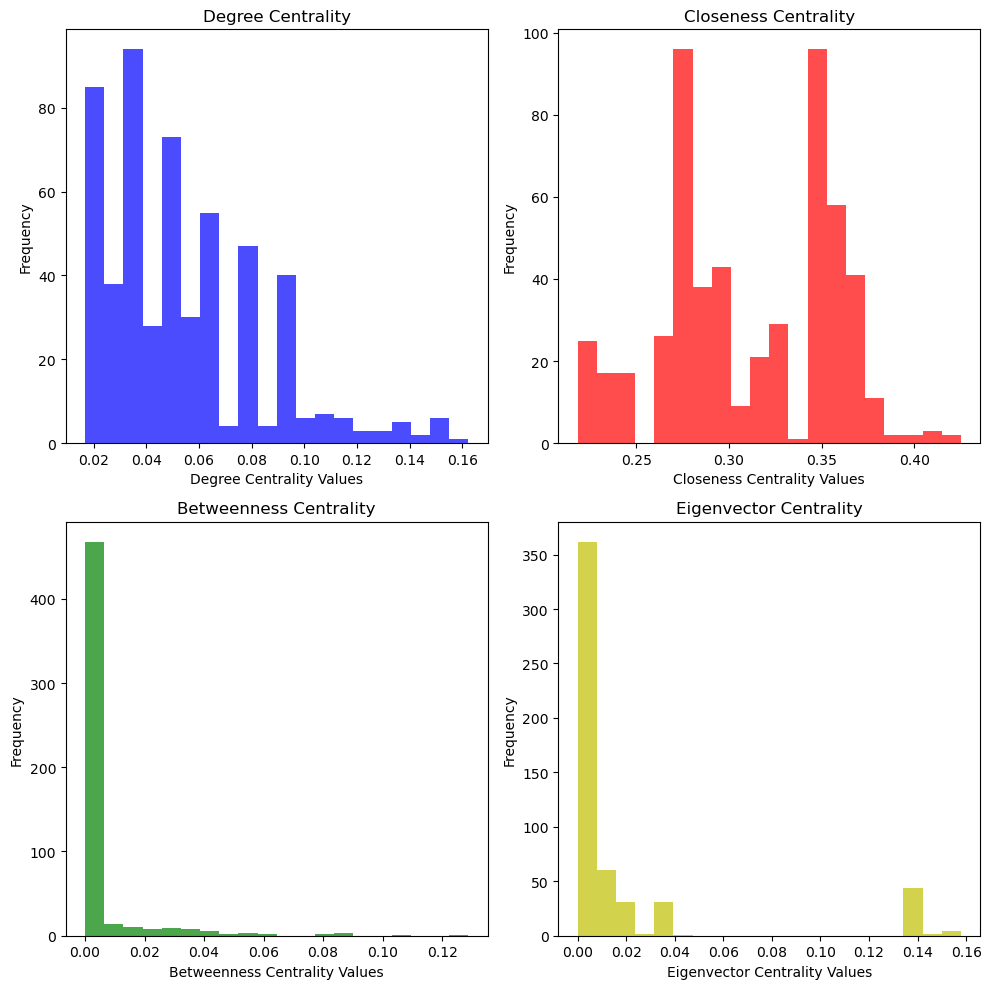

In [5]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))

axs[0, 0].hist(degree_centrality.values(), bins=20, color='b', alpha=0.7)
axs[0, 0].set_title('Degree Centrality')
axs[0, 0].set_xlabel('Degree Centrality Values')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(closeness_centrality.values(), bins=20, color='r', alpha=0.7)
axs[0, 1].set_title('Closeness Centrality')
axs[0, 1].set_xlabel('Closeness Centrality Values')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(betweenness_centrality.values(), bins=20, color='g', alpha=0.7)
axs[1, 0].set_title('Betweenness Centrality')
axs[1, 0].set_xlabel('Betweenness Centrality Values')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(eigenvector_centrality.values(), bins=20, color='y', alpha=0.7)
axs[1, 1].set_title('Eigenvector Centrality')
axs[1, 1].set_xlabel('Eigenvector Centrality Values')
axs[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
